# Diabetes Prediction ---

#### Import all Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
# printing the first 5 row of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Missing Data Handling

In [5]:
# Replace zeros with NaN, then impute
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_dataset[columns_with_zeros] = diabetes_dataset[columns_with_zeros].replace(0, np.nan)

# Impute with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
diabetes_dataset[columns_with_zeros] = imputer.fit_transform(diabetes_dataset[columns_with_zeros])

In [6]:
# Number of row and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [10]:
# Separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome',axis = 1)
Y = diabetes_dataset['Outcome']

In [11]:
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data standardization

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [15]:
standardized_data = scaler.transform(X)

In [16]:
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [18]:
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train test Split

In [19]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
# 0.2 is 20 % of test data 

In [20]:
print(X.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#### Training the Model

In [21]:
classifier = svm.SVC(kernel = 'linear')

In [22]:
# training the support vector machine classifier
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Model Evaluation

In [24]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.7801302931596091


In [26]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score of the test data: ' , test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))

Confusion Matrix:
 [[91  9]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



###  Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.7654005064640811


### Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

CV Accuracy: 0.7621 (+/- 0.0320)


###  Feature Importance/Analysis

In [31]:
# For linear kernel
feature_importance = pd.DataFrame({
    'Feature': diabetes_dataset.drop('Outcome', axis=1).columns,
    'Coefficient': classifier.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)

                    Feature  Coefficient
1                   Glucose     0.944639
5                       BMI     0.528311
0               Pregnancies     0.310651
6  DiabetesPedigreeFunction     0.248568
4                   Insulin    -0.092148
7                       Age     0.064710
2             BloodPressure    -0.056895
3             SkinThickness    -0.020702


### Visualization

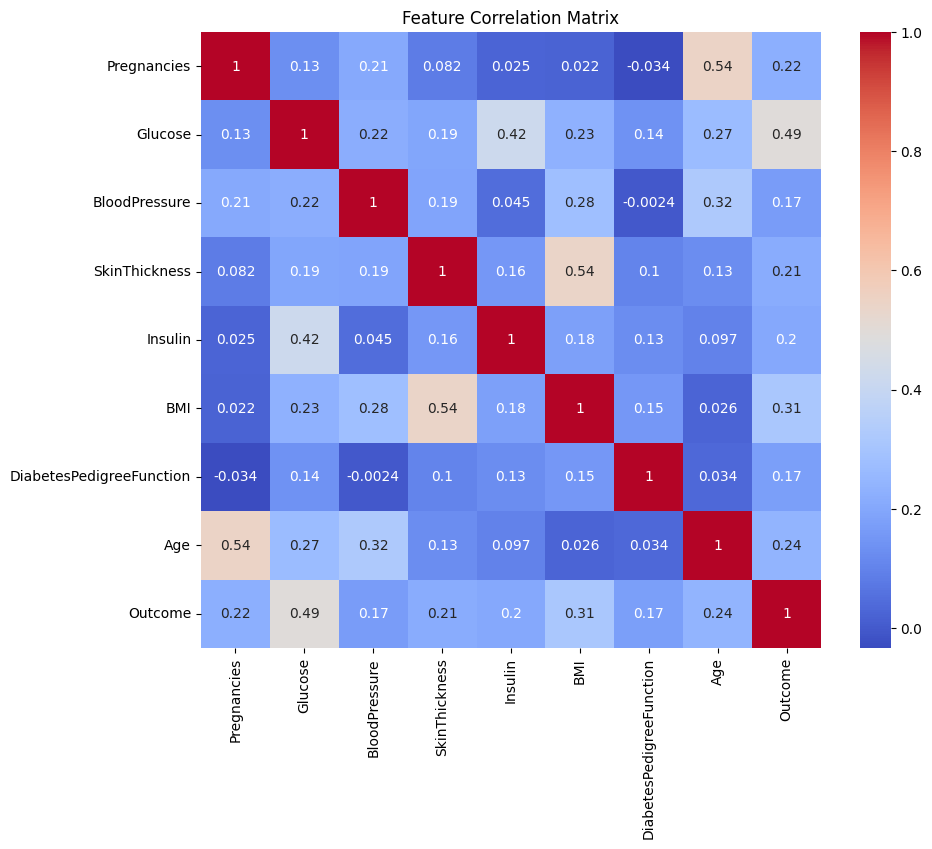

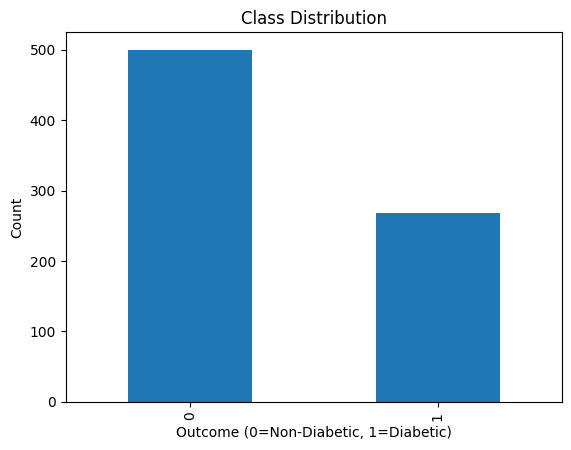

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Distribution of outcomes
diabetes_dataset['Outcome'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
plt.ylabel('Count')
plt.show()

### Predictive System

In [33]:
def predict_diabetes(input_data, classifier, scaler):
    """
    Predict diabetes with confidence score
    
    Parameters:
    input_data: tuple of 8 features
    classifier: trained SVM model
    scaler: fitted StandardScaler
    
    Returns:
    prediction and decision function value
    """
    # Convert to numpy array and reshape
    input_array = np.asarray(input_data).reshape(1, -1)
    
    # Standardize
    std_data = scaler.transform(input_array)
    
    # Predict
    prediction = classifier.predict(std_data)
    decision_value = classifier.decision_function(std_data)
    
    result = "diabetic" if prediction[0] == 1 else "not diabetic"
    confidence = abs(decision_value[0])
    
    print(f"Prediction: The person is {result}")
    print(f"Decision function value: {decision_value[0]:.3f}")
    print(f"Confidence: {confidence:.3f}")
    
    return prediction[0], decision_value[0]

# Example usage
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data, classifier, scaler)

Prediction: The person is diabetic
Decision function value: 0.429
Confidence: 0.429


C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(np.int64(1), np.float64(0.42943948133111565))

### Save the Model

In [34]:
import pickle

# Save the model and scaler
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)